# Boston Housing Price Predictions

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_dataset = load_boston()

In [3]:
boston_df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston_df['Price'] = boston_dataset.target

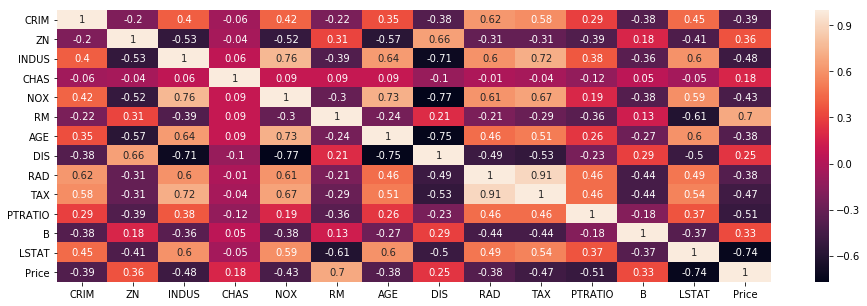

In [4]:
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
#x_val = np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM']
x_val = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
y_val = boston_df['Price']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_val,y_val,test_size=0.2,random_state=4)

In [7]:
regress = linear_model.LinearRegression()

In [8]:
regress.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_pred_on_trainset = regress.predict(x_train)
y_pred_on_testset = regress.predict(x_test)

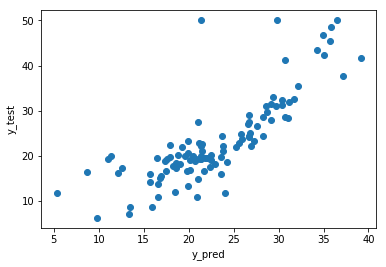

In [13]:
plt.scatter(y_pred_on_testset,y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [14]:
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_on_trainset)))
r2 = r2_score(y_train, y_pred_on_trainset)

print("Performa model training")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 score = {}'.format(r2))
print("\n")

Performa model training
--------------------------------------
RMSE = 5.46931314622
R2 score = 0.635239478495




In [15]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_on_testset)))
r2 = r2_score(y_test, y_pred_on_testset)

print("Performa model testing")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 score = {}'.format(r2))
print("\n")

Performa model testing
--------------------------------------
RMSE = 5.76636931732
R2 score = 0.642035819105


